In [17]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import gmsh
import cv2
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns

In [3]:
# Setting Matplotlib plotting defaults
# Font
mpl.rcParams['font.family']           ='Serif'    # Setting Font family
mpl.rcParams['font.size']             = 18        # Setting Font size
# Figure
mpl.rcParams["figure.figsize"]        = (11, 7)   # Setting Figure size
mpl.rcParams['savefig.dpi']           = 300       # Setting plot quality
# Legend
mpl.rcParams["legend.fontsize"]       = 15        # Legend fontsize
mpl.rcParams["legend.title_fontsize"] = 15        # Legend fontsize
# Grid
mpl.rcParams["axes.grid"]             = True      # Setting grid to display
mpl.rcParams["grid.color"]            ='black'    # Setting grid color
mpl.rcParams['grid.linestyle']        ='dotted'   # Setting grid linestyle
mpl.rcParams['grid.linewidth']        = 0.3       # Setting grid linewidth
# xticks
mpl.rcParams["xtick.minor.visible"]   = True      # Setting visibility of xticks
mpl.rcParams['xtick.minor.width']     = 1.0       # Setting width of minor xticks
mpl.rcParams['xtick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['xtick.direction']       ='inout'    # Setting directions of xticks
mpl.rcParams['xtick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['xtick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['xtick.top']             = True      # Setting visibility of top minor xticks
# yticks
mpl.rcParams["ytick.minor.visible"]   = True      # Setting visibility of yticks
mpl.rcParams['ytick.minor.width']     = 1.0       # Setting width of minor yticks
mpl.rcParams['ytick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['ytick.direction']       ='inout'    # Setting directions of yticks
mpl.rcParams['ytick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['ytick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['ytick.right']           = True      # Setting visibility of top minor xticks

In [4]:
datadf = pd.read_excel('raw_data_file.xlsx')

In [5]:
data = datadf[datadf[datadf.columns[1]] == 'fulfilled']

In [6]:
weeks = data[data.columns[10]].dt.isocalendar().week
salesWeekWise = data.groupby(weeks)['Lineitem price'].sum()
months = data[data.columns[10]].dt.month
salesMonthWise = data.groupby(months)['Lineitem price'].sum()

In [7]:
weeksNumbers = weeks.unique()
monthNumbers = months.unique()

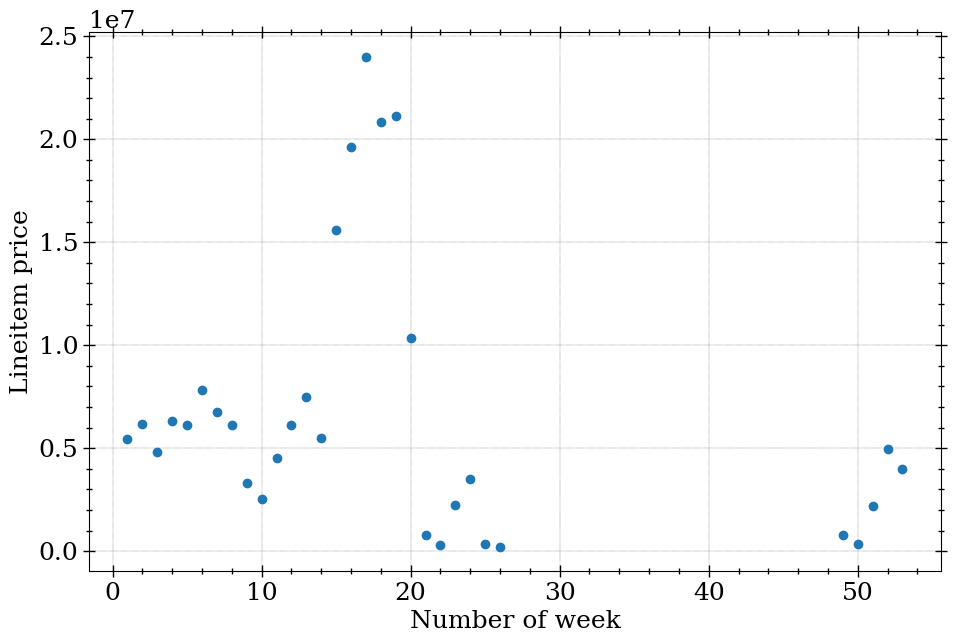

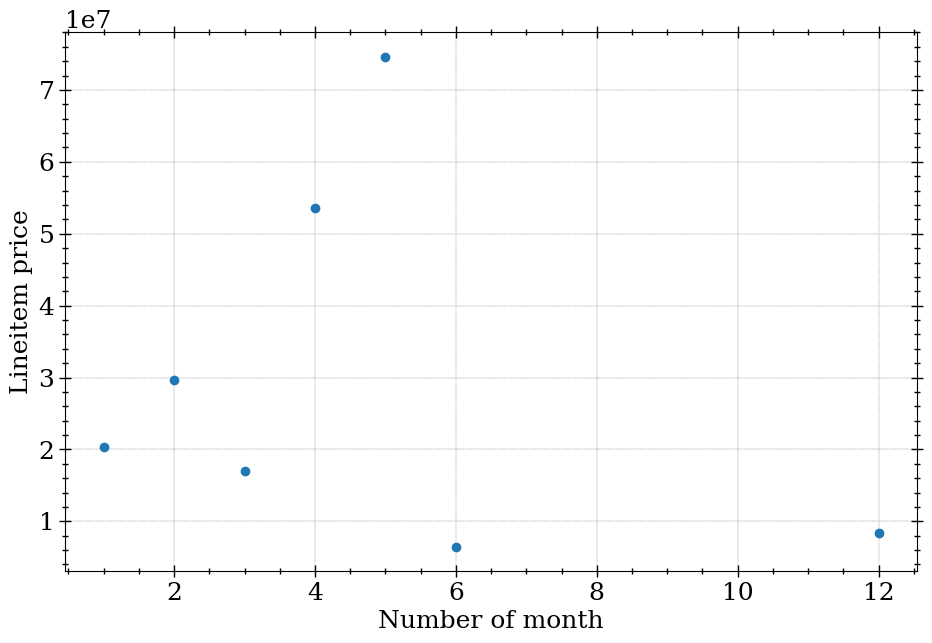

In [8]:
plt.xlabel('Number of week')
plt.ylabel('Lineitem price')
plt.plot(weeksNumbers,salesWeekWise,'o')
plt.show()
plt.xlabel('Number of month')
plt.ylabel('Lineitem price')
plt.plot(monthNumbers,salesMonthWise,'o')
plt.show()


In [9]:
weeks = data[data.columns[10]].dt.isocalendar().week
salesWeekWise = data.groupby(weeks)['Lineitem price'].sum()
months = data[data.columns[10]].dt.month
salesMonthWise = data.groupby(months)['Lineitem price'].sum()

Observations:
Spikes in Lineitem Price: There are a few significant spikes (e.g., between Week 7–10 and Week 15–20).<br>
Drops in Lineitem Price: Several weeks show very low or near-zero revenue, especially around Weeks 20–30.<br>
Periodic Trends: Peaks and troughs seem to repeat around certain intervals, which could indicate cyclical patterns (e.g., seasonality, events, or campaigns).

First 10 weeks can be seen as most sells may be due to following resons:

Winter Season (Northern Hemisphere):
High demand for winter clothing like jackets, sweaters, and thermals due to cold weather.
Clearance sales of winter collections in preparation for spring inventory.<br><br>
New Year Festivities:
People may buy new clothes for celebrations and gatherings.
Retailers often stock more clothes for New Year discounts and sales.

Economic reason can be<br>
End-of-Financial-Year Sales:
Retailers may increase supply to meet sales targets before the end of the fiscal year (varies by region).


May is seen to have sudden surge due to <br>
Spring/Summer Season:
Transition to lighter fabrics, bright colors, and summer wear.
Launch of spring/summer collections by fashion brands.

In [10]:
cities = data[data.columns[-7]].astype(str).str.lower()
cities = cities.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
cities = cities.str.replace(' ', '') 
cities = cities.str.lower()
cities = cities.replace('bengaluru','bangalore')
city,cnts= np.unique(cities,return_counts=True)
sortedcnts = np.argsort(cnts)[::-1]

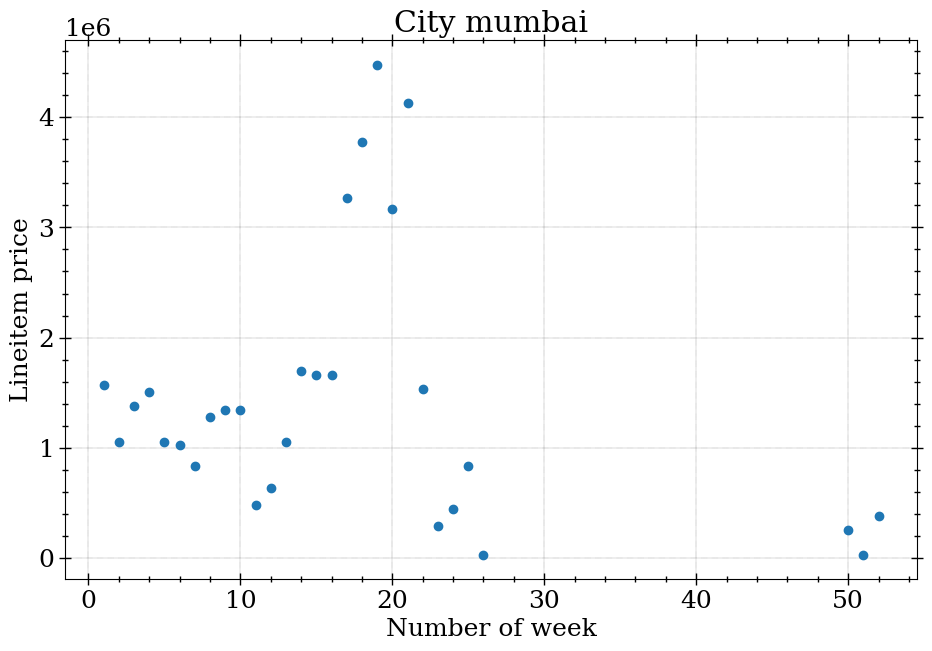

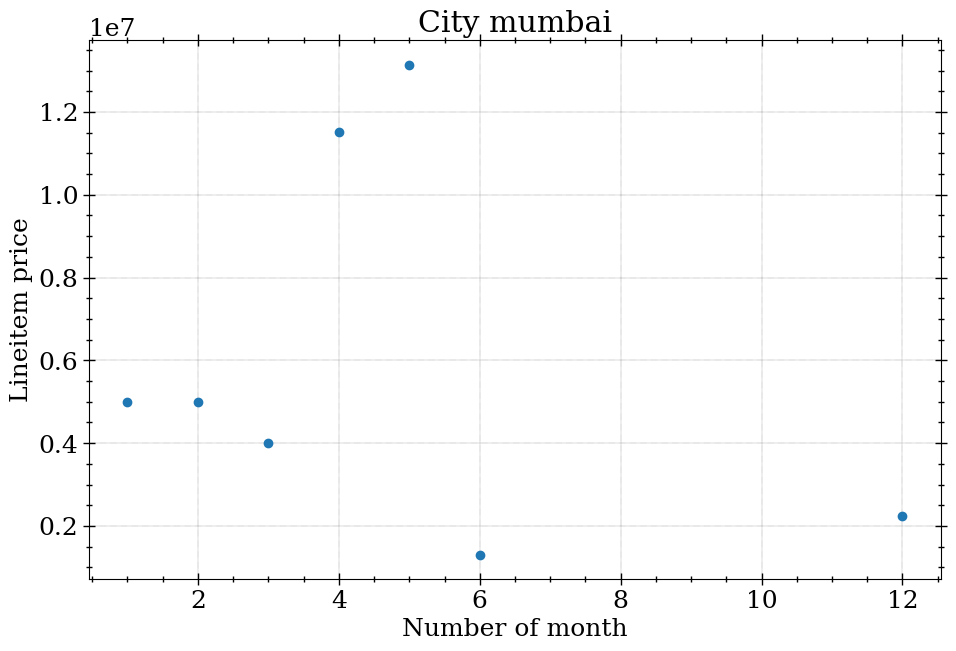

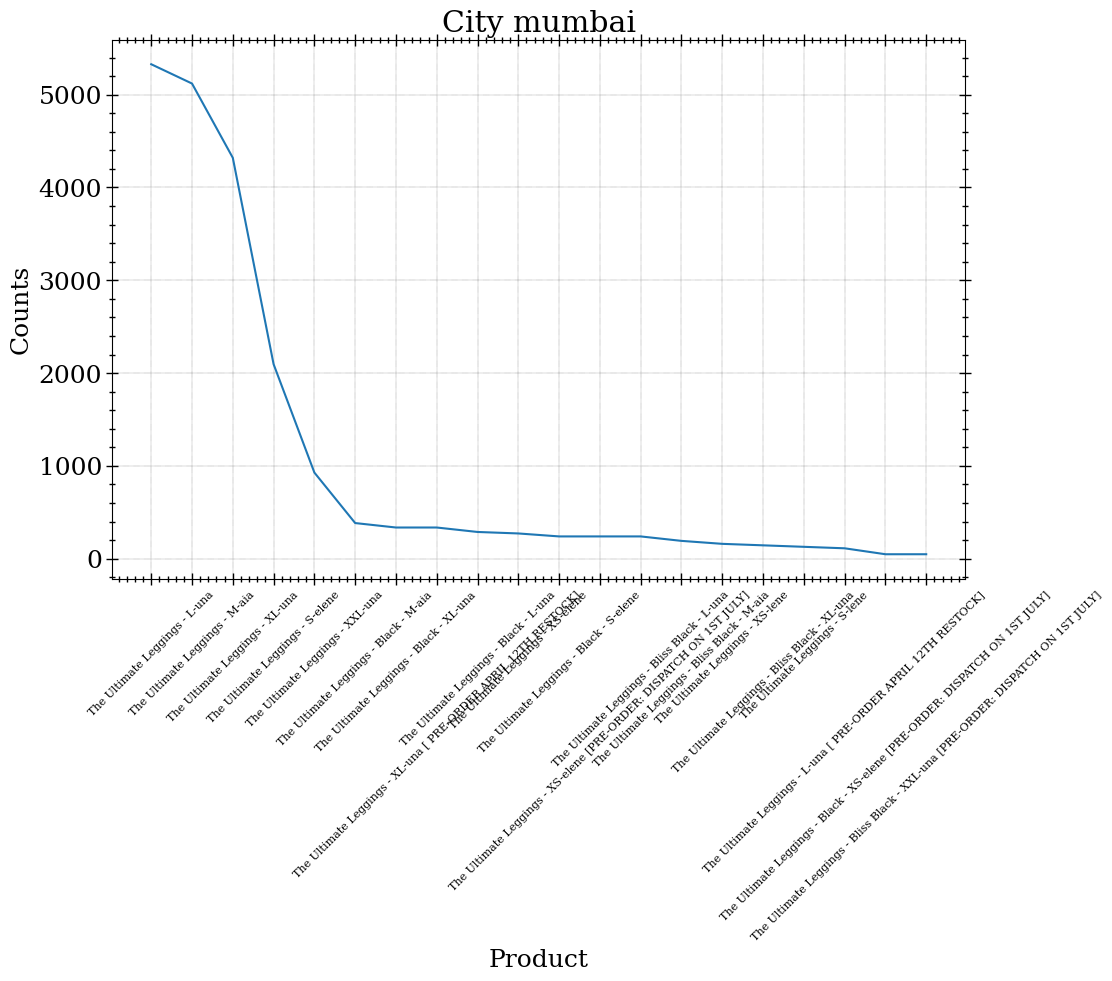

C:\Users\aksha\AppData\Local\Temp\ipykernel_33164\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


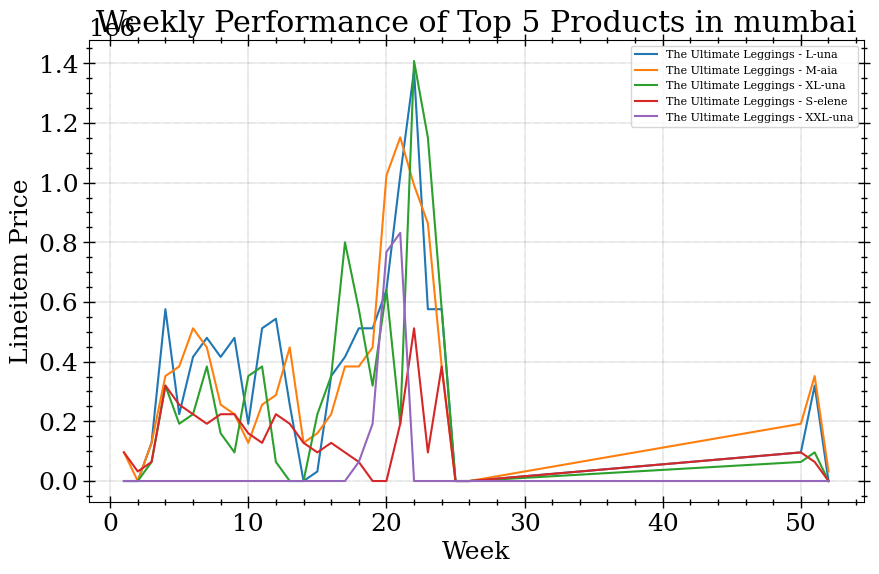

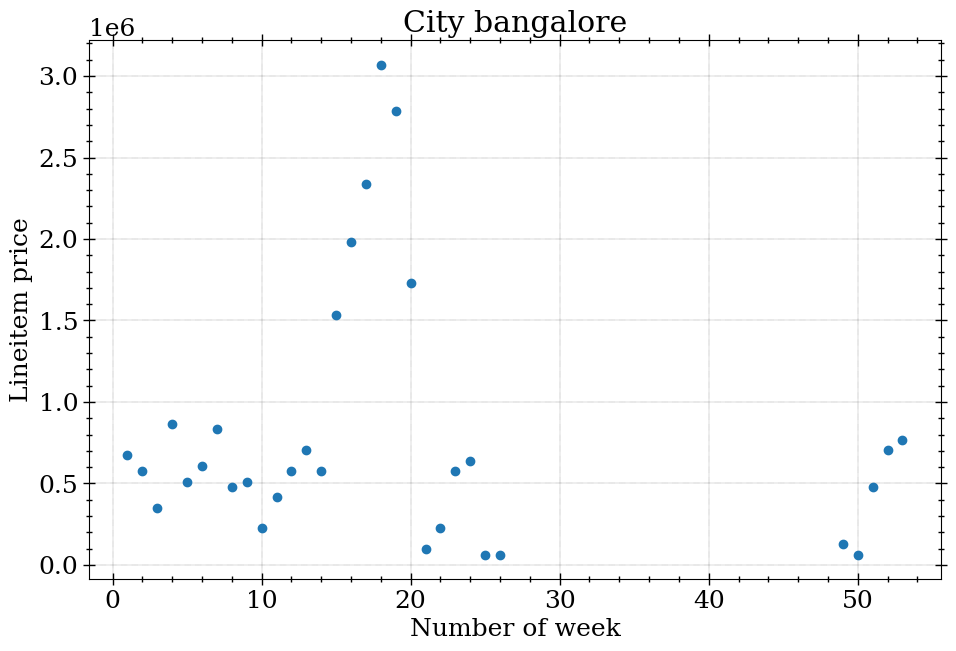

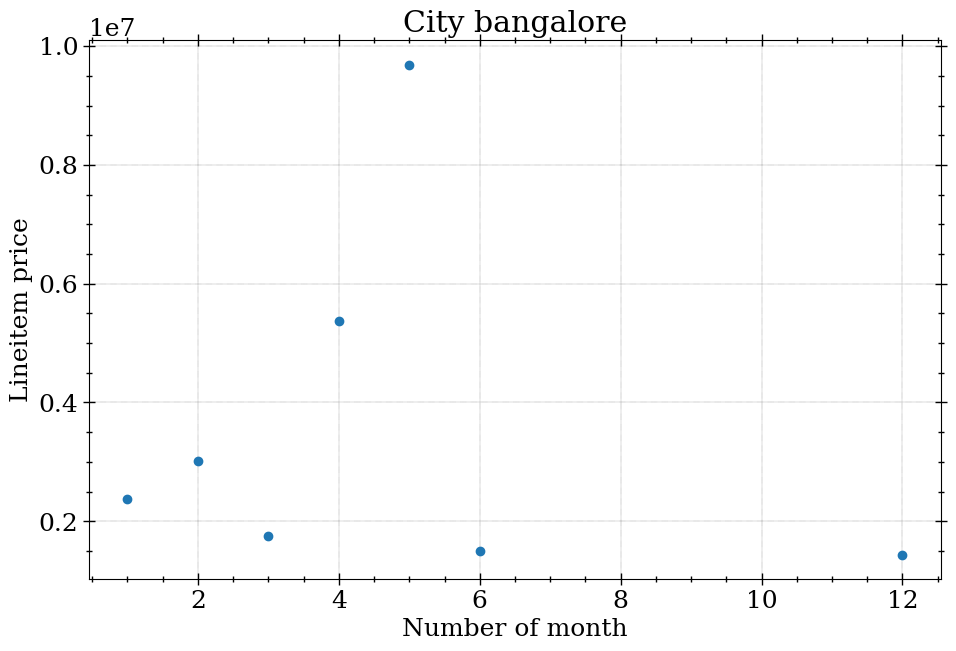

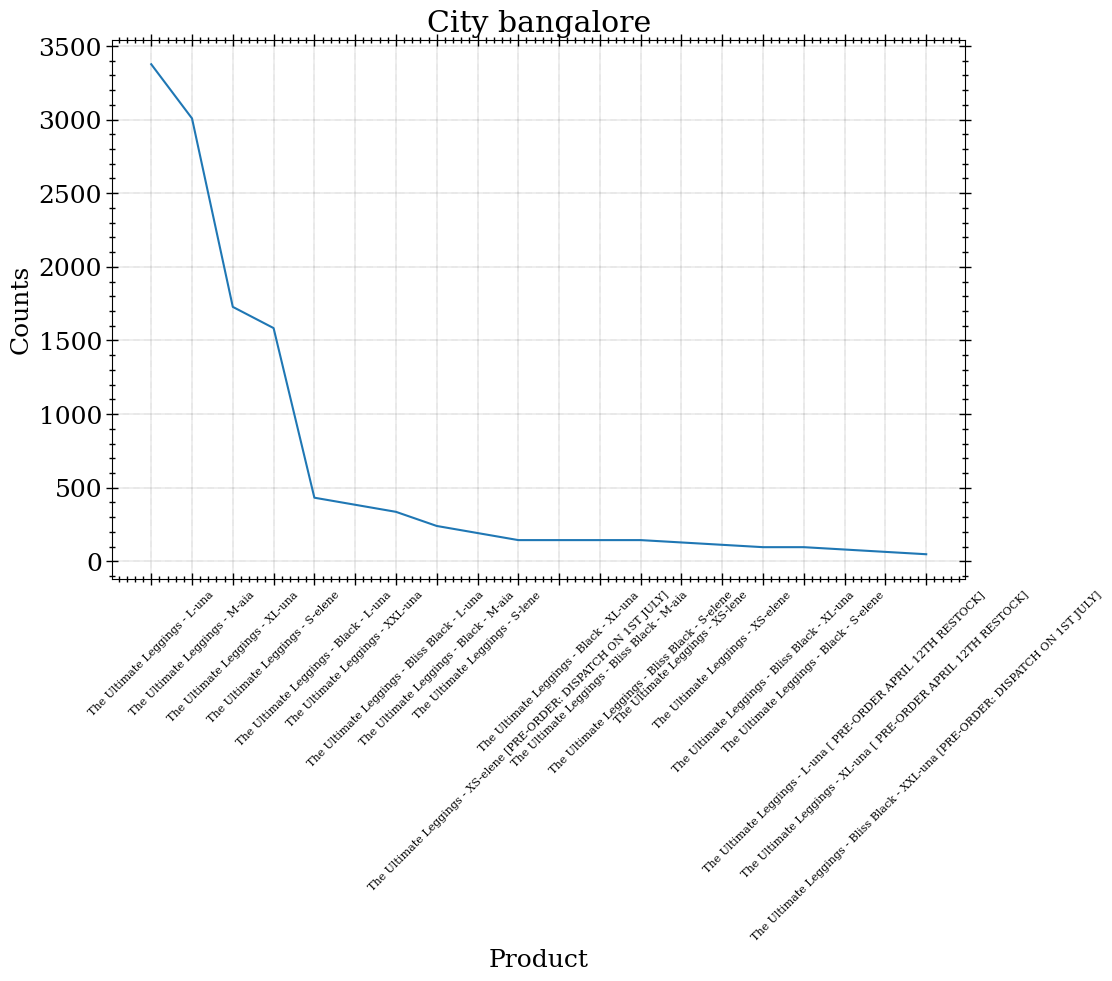

C:\Users\aksha\AppData\Local\Temp\ipykernel_33164\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


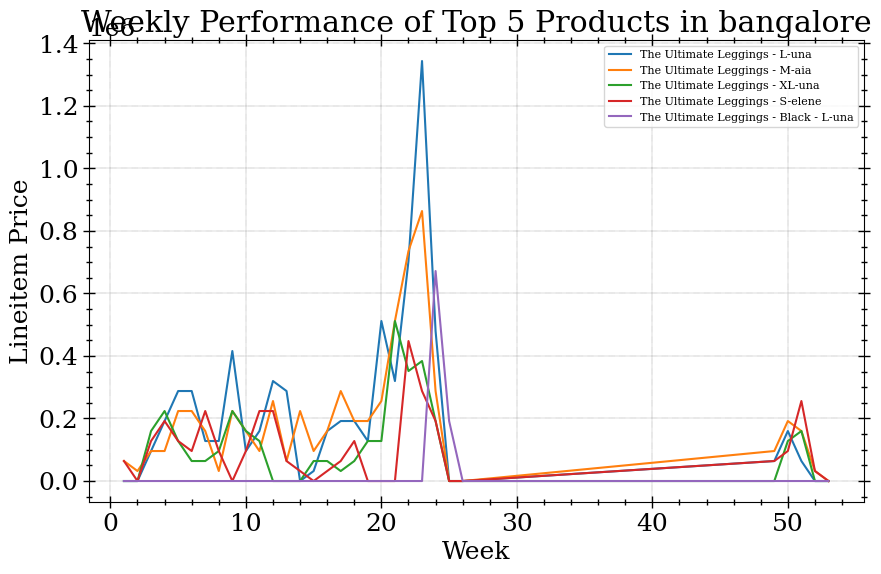

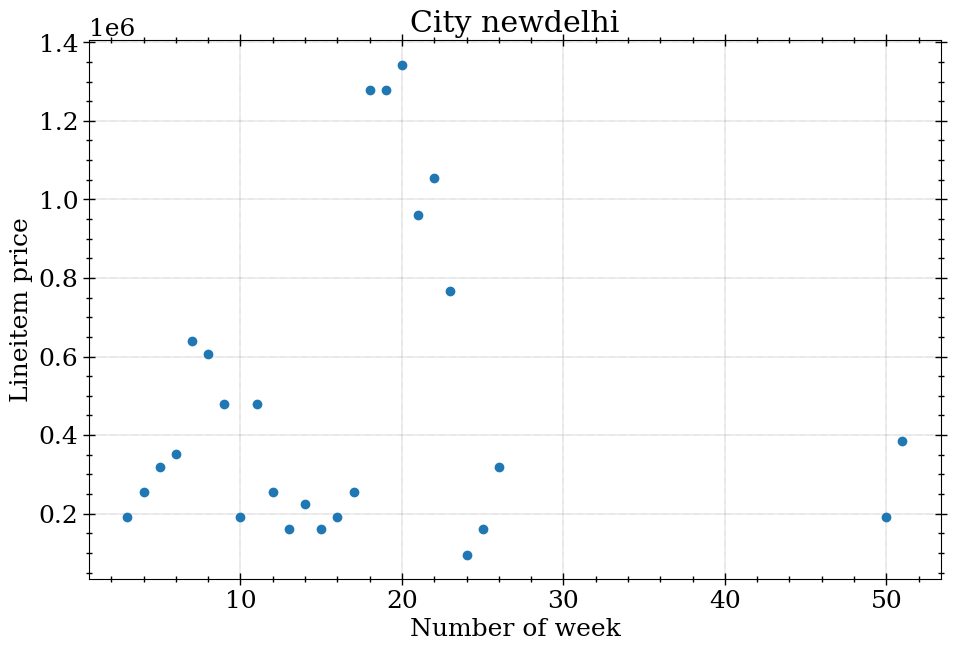

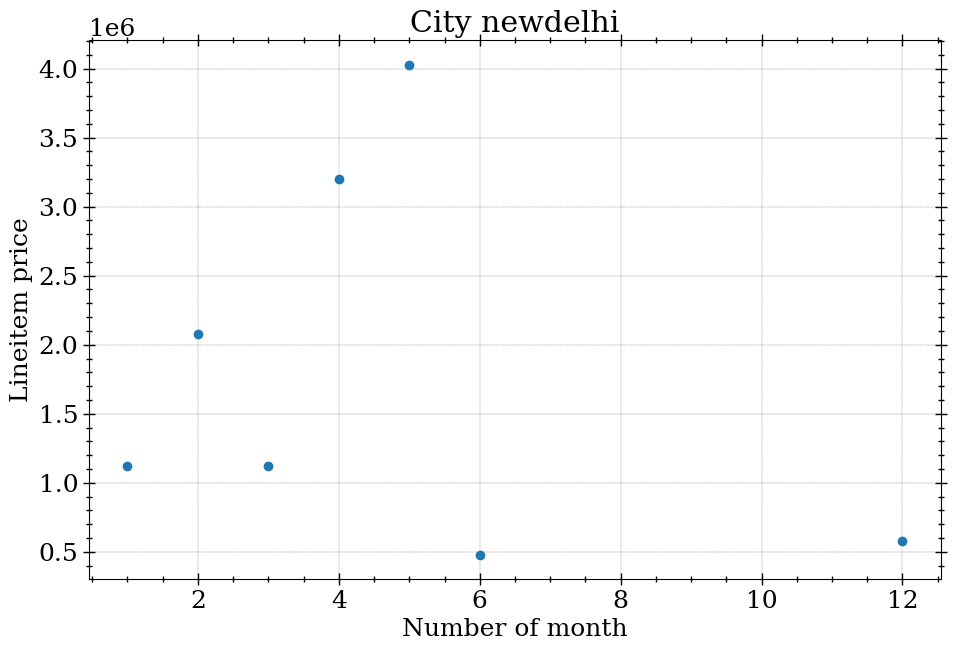

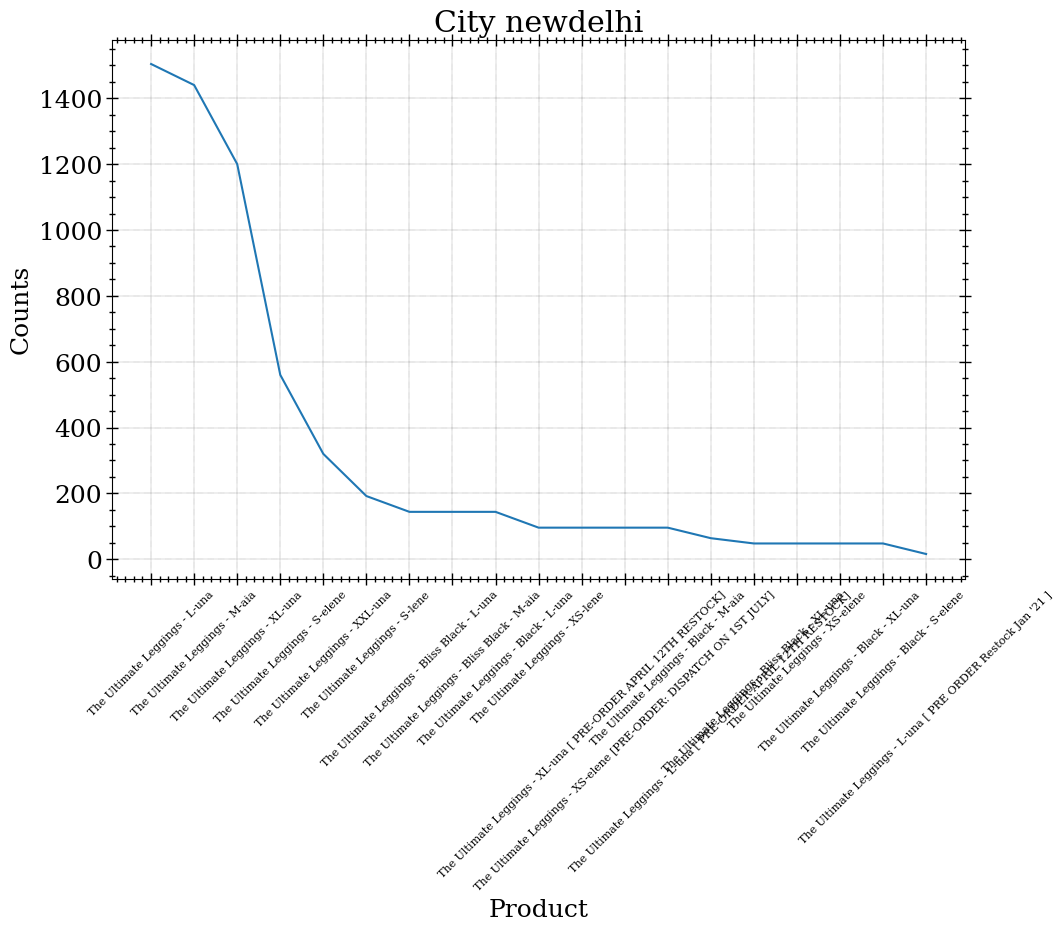

C:\Users\aksha\AppData\Local\Temp\ipykernel_33164\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


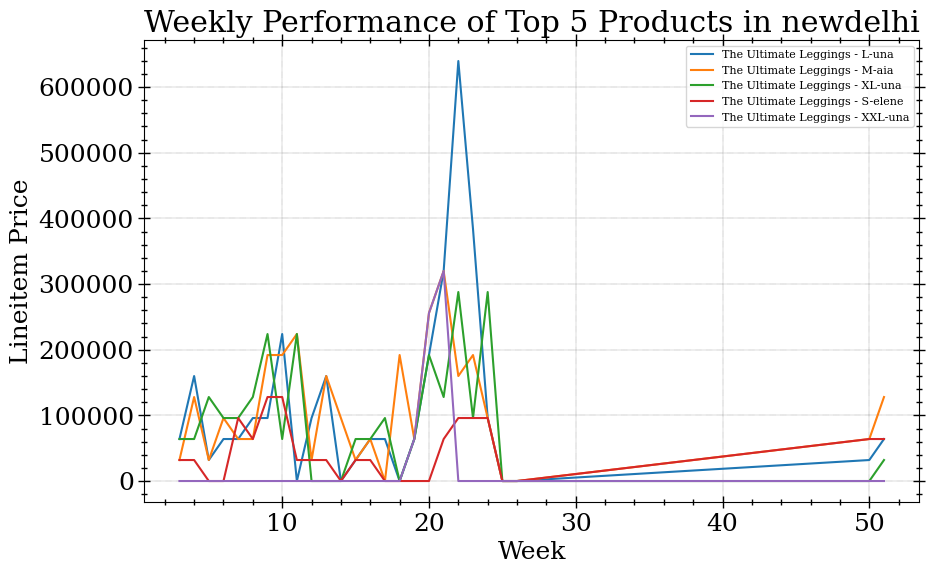

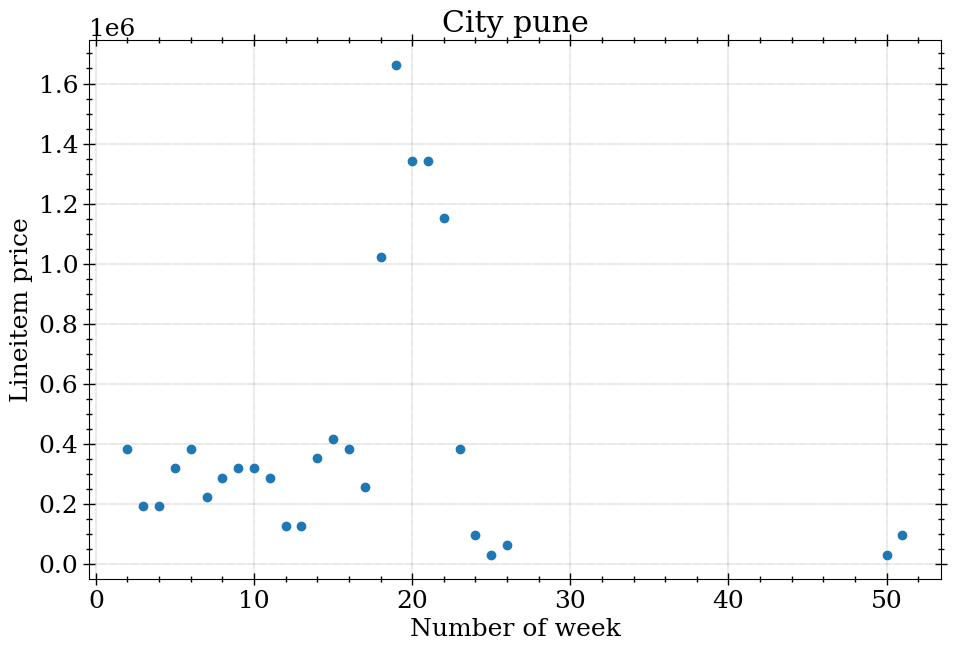

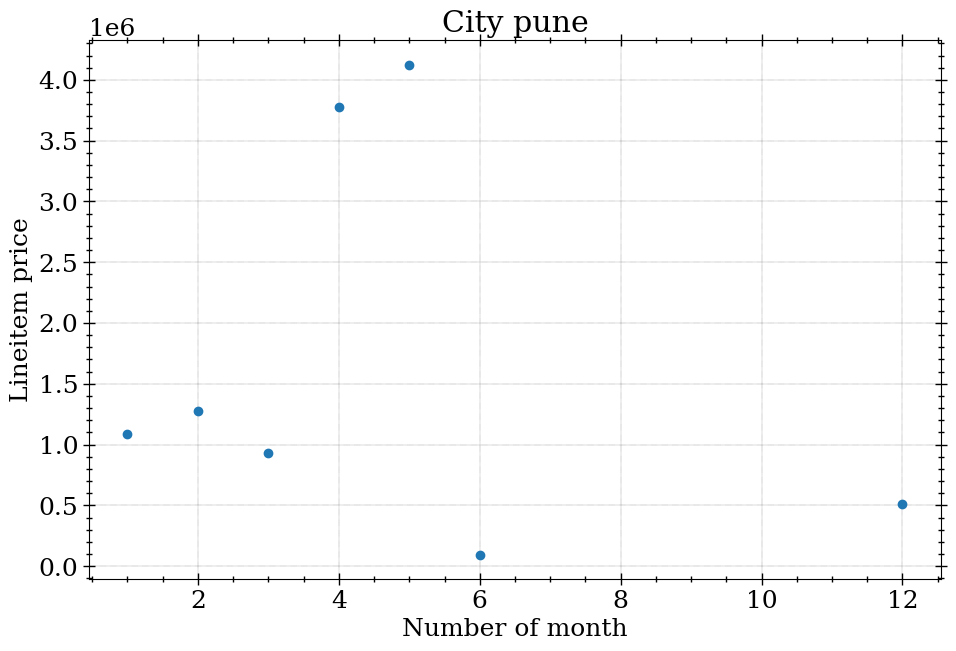

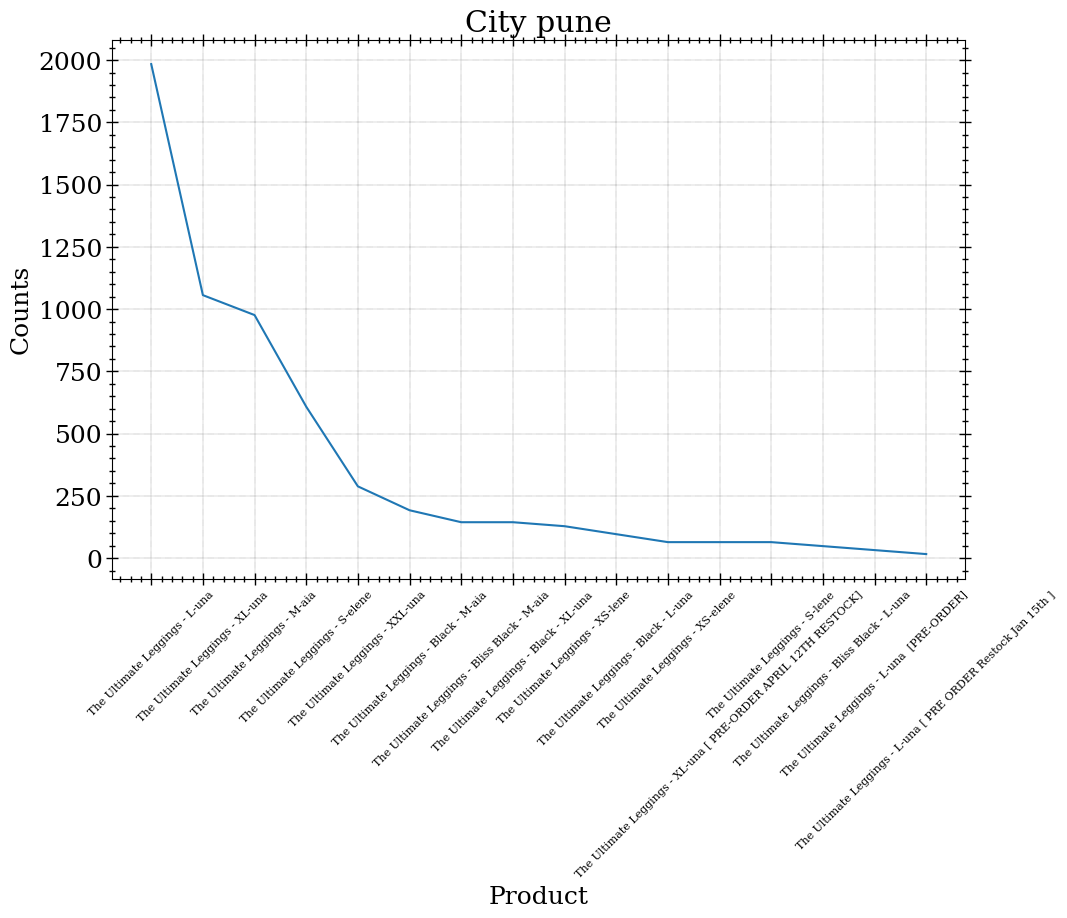

C:\Users\aksha\AppData\Local\Temp\ipykernel_33164\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


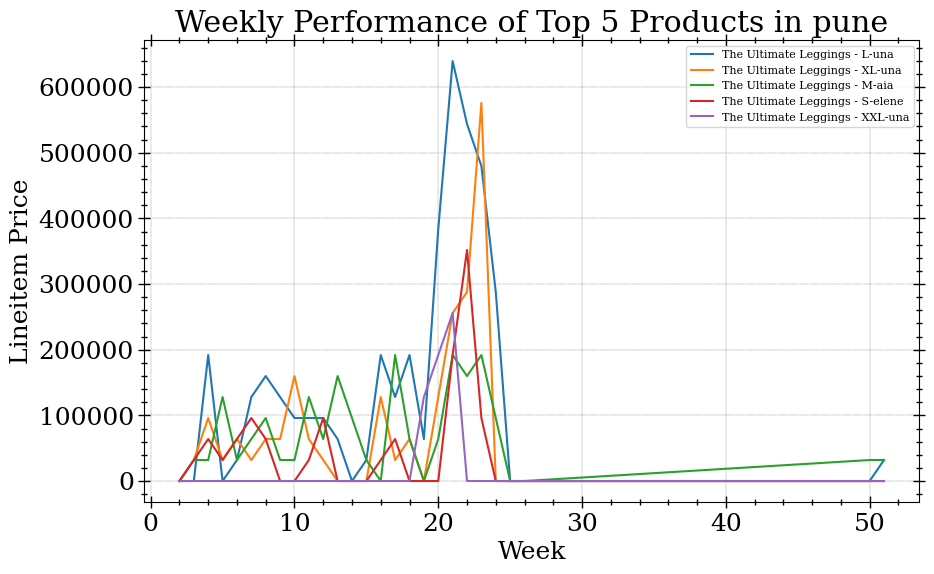

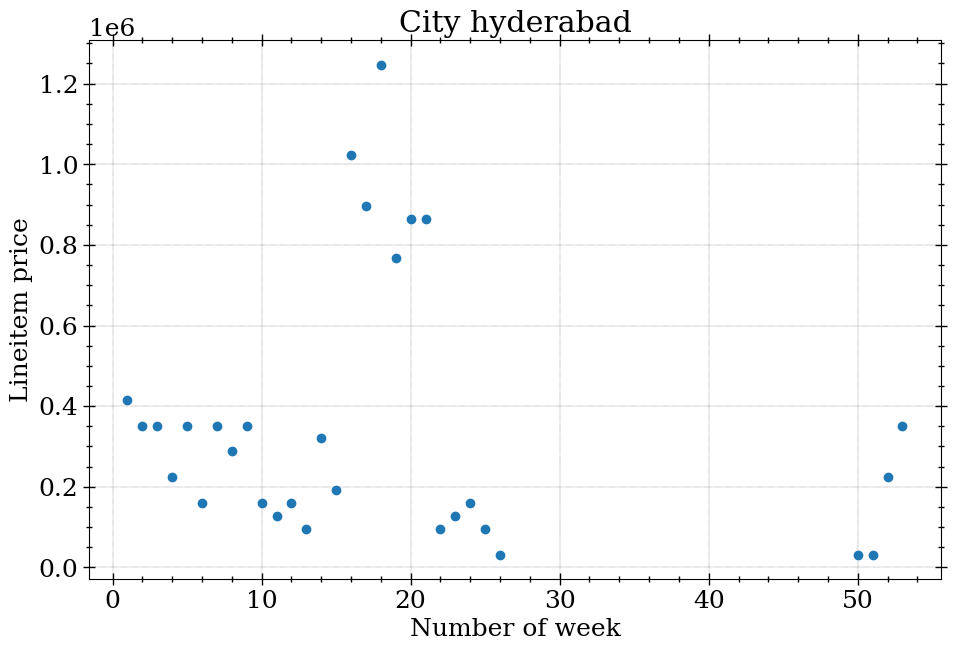

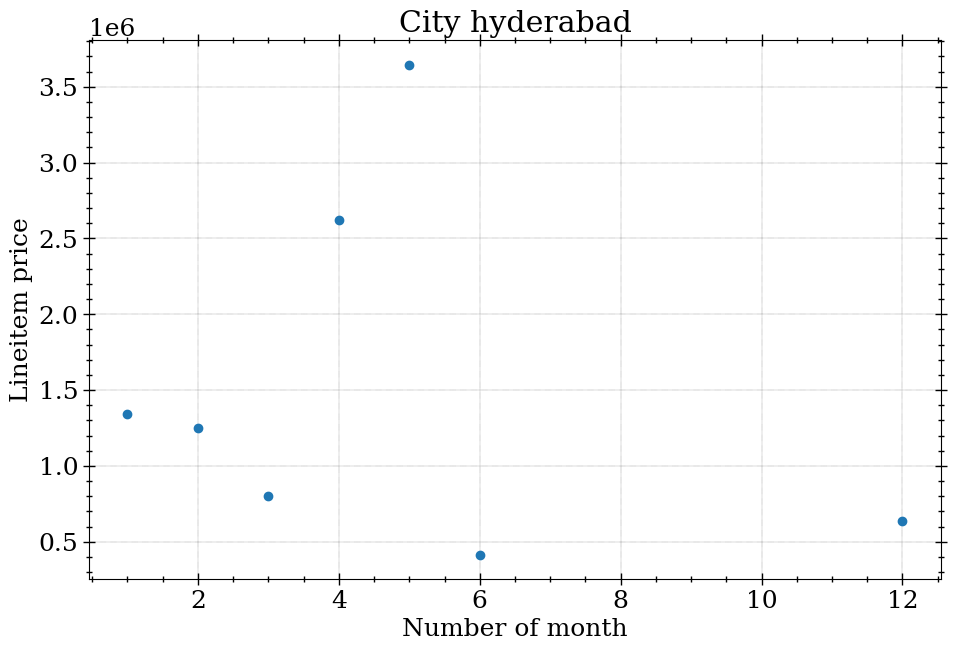

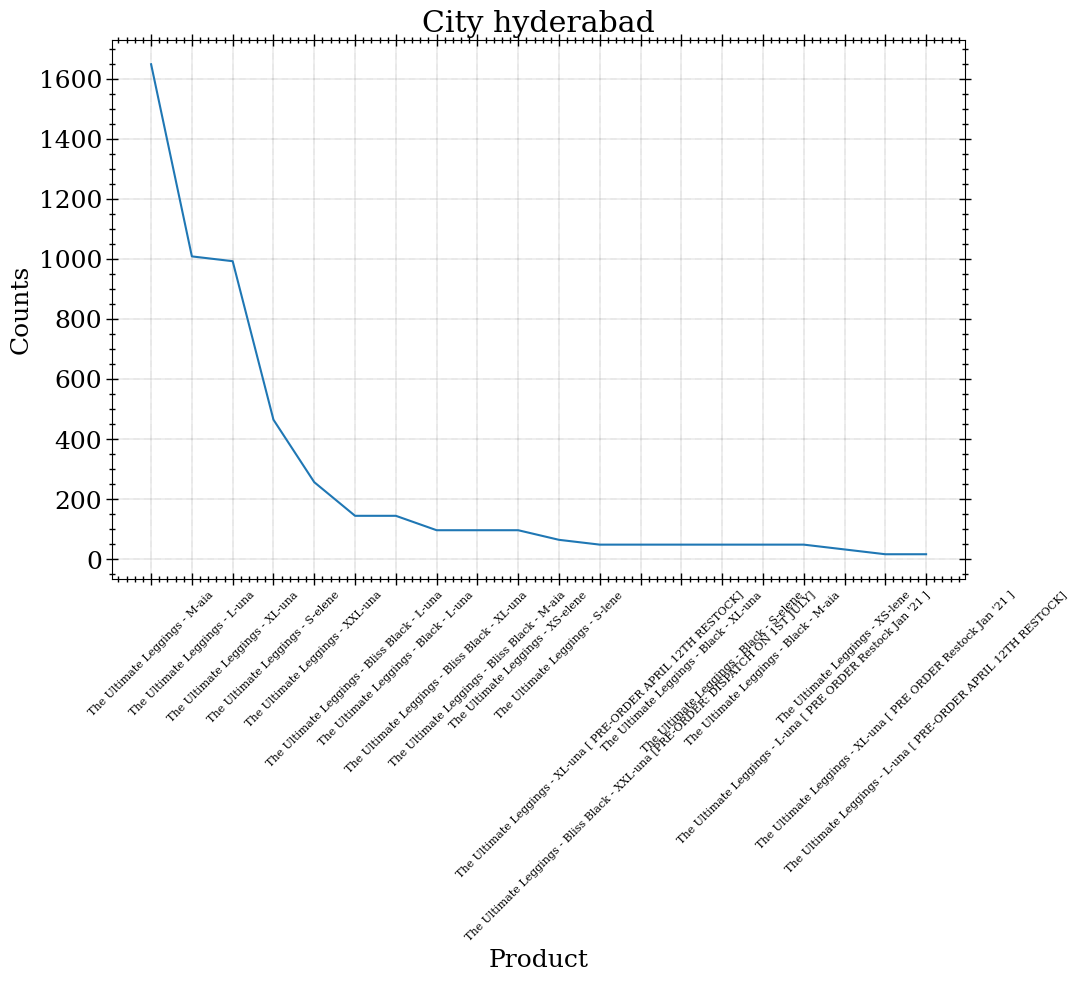

C:\Users\aksha\AppData\Local\Temp\ipykernel_33164\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


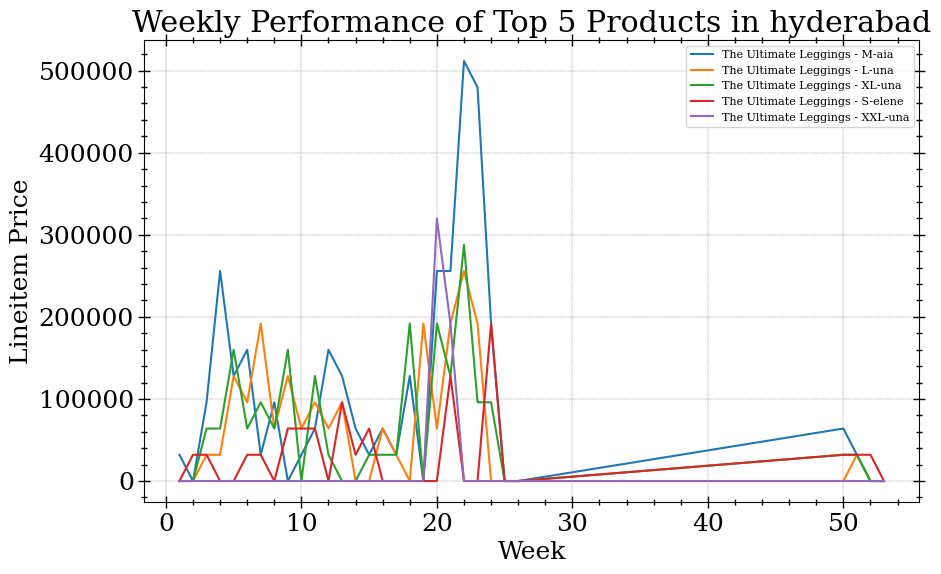

In [83]:
k = 5
topKproducts = 20
topKproductsForAnalysis = 5
topKcities = city[sortedcnts[:k]]
monthsDataForKCities = []
weeksDataForKCities = []
weeklyPerformance = {}
for ithcity in topKcities:
    dataKthCity = data[cities == ithcity]
    prod,count = np.unique(dataKthCity['Product'],return_counts=True)
    sortedcounts = np.argsort(count)[::-1]

    weeks = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week
    salesWeekWise = dataKthCity.groupby(weeks)['Lineitem price'].sum()
    months = dataKthCity[dataKthCity.columns[10]].dt.month
    salesMonthWise = dataKthCity.groupby(months)['Lineitem price'].sum()

    weeksNumbers = weeks.unique().to_numpy().astype(int)
    monthNumbers = months.unique()

    weeksData = np.zeros(53)
    monthsData = np.zeros(12)
    weeksData[weeksNumbers-1] += salesWeekWise
    monthsData[monthNumbers-1] += salesMonthWise
    weeksDataForKCities.append(weeksData)
    monthsDataForKCities.append(monthsData)

    plt.xlabel('Number of week')
    plt.ylabel('Lineitem price')
    plt.title(f'City {ithcity}')
    plt.plot(weeksNumbers,salesWeekWise,'o')
    plt.show()
    plt.xlabel('Number of month')
    plt.ylabel('Lineitem price')
    plt.title(f'City {ithcity}')
    plt.plot(monthNumbers,salesMonthWise,'o')
    plt.show()

    plt.xlabel('Product')
    plt.ylabel('Counts')
    plt.title(f'City {ithcity}')
    plt.plot(prod[sortedcounts[:topKproducts]],count[sortedcounts[:topKproducts]])
    plt.xticks(rotation=45, fontsize=8)  # Set font size to 
    plt.show()

    #ChatGPT
    dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week
    weeklyProductSales = dataKthCity.groupby(['Week', 'Product'])['Lineitem price'].sum().unstack(fill_value=0)

    # Keep only the topK products
    prod, count = np.unique(dataKthCity['Product'], return_counts=True)
    sortedcounts = np.argsort(count)[::-1]
    topProducts = prod[sortedcounts[:topKproductsForAnalysis]]
    weeklyProductSalesTop = weeklyProductSales[topProducts]

    # Add to dictionary for further analysis
    weeklyPerformance[ithcity] = weeklyProductSalesTop

    # Plot weekly performance for each top product
    plt.figure(figsize=(10, 6))
    plt.title(f"Weekly Performance of Top {topKproductsForAnalysis} Products in {ithcity}")
    for product in topProducts:
        if product in weeklyProductSalesTop.columns:
            plt.plot(weeklyProductSalesTop.index, weeklyProductSalesTop[product], label=product)
    plt.xlabel("Week")
    plt.ylabel("Lineitem Price")
    plt.legend(fontsize=8)
    plt.show()


Mumbai:<br>
Best-sellers: "The Ultimate Leggings - Luna" leads sales.<br>
Sizes: Larger sizes (XL, XXL) perform better than smaller ones. This indicates a strong preference for plus-size products.<br>
Colors: Luna (likely a neutral or popular shade) dominates, followed by Black.<br>
Revenue Implications: Focus on stocking larger sizes in Luna and Black colors. Given the high volume, premium pricing could maximize revenue without impacting demand.<br><br>
Bangalore:<br>
Best-sellers: Similar trends to Mumbai; "The Ultimate Leggings - Luna" is the top seller.<br>
Sizes: Medium and XL sizes have higher sales volumes.<br>
Colors: Black and Luna are consistently popular.<br>
Revenue Implications: Bangalore shows a slightly more even distribution across sizes. Consider offering size-specific promotions and bundles to encourage cross-sales. Luna’s dominance suggests it should remain a priority, but additional shades could be tested here for diversification.
<br><br>
New Delhi:<br>
Best-sellers: "The Ultimate Leggings - Luna" again leads but has fewer overall sales compared to Mumbai and Bangalore.<br>
Sizes: Medium and Large sizes are preferred.<br>
Colors: Luna remains dominant, with Black as a secondary choice.<br>
Revenue Implications: New Delhi shows more moderate demand. Focus on mid-tier sizes and standard colors to maintain cost efficiency in inventory management.<br><br>
Pune:<br>
Best-sellers: "The Ultimate Leggings - Luna" leads significantly, with a sharp decline in demand for other products.<br>
Sizes: Medium and Large dominate the sales.<br>
Colors: Luna continues to be a hit.<br>
Revenue Implications: Given the sharp drop-off in demand for other products, focus on consolidating inventory around high-performing SKUs like Luna in Medium and Large sizes. Promotions for secondary products might help reduce inventory waste.<br><br>
Hyderabad:<br>
Best-sellers: "The Ultimate Leggings - Luna" is the top product, but overall demand is lower compared to Mumbai and Bangalore.<br>
Sizes: Medium sizes are leading, followed by XL.<br>
Colors: Luna and Black are key.<br>
Revenue Implications: Hyderabad has potential for growth but shows a conservative buying trend. Focus on standard sizes and colors while introducing limited-time offers to stimulate demand.<br><br><br>
General Observations Across Cities:<br>
Colors:

Luna is consistently the best-selling color, indicating universal appeal. Black is a strong second.
Experimenting with additional shades (e.g., neutrals or trendy colors) could unlock incremental sales.<br>
Sizes:

Larger sizes like XL and XXL perform well in cities like Mumbai, indicating inclusivity as a key driver of sales.
Medium sizes are more popular in Bangalore, New Delhi, and Hyderabad.
Focus on regional size preferences to optimize inventory.<br>
Revenue Optimization:

Premium-priced products like "The Ultimate Leggings - Luna" are driving sales. Extending this line with seasonal designs (e.g., patterns, limited editions) can boost revenue.
Bundles offering Luna in different sizes or colors may increase average order value.
Invest in targeted advertising highlighting inclusivity in sizing and the versatility of Luna to appeal to diverse customers.<br>
Restocking Strategy:

Luna and Black are consistently high performers. Ensure steady stock for these SKUs across all major cities.
Discontinue or heavily discount slow-moving colors or sizes to free up working capital.<br>
Localized Insights:

Cities like Mumbai and Bangalore show potential for premium offerings due to higher volumes.
Pune and Hyderabad might respond better to value-driven pricing strategies and discout

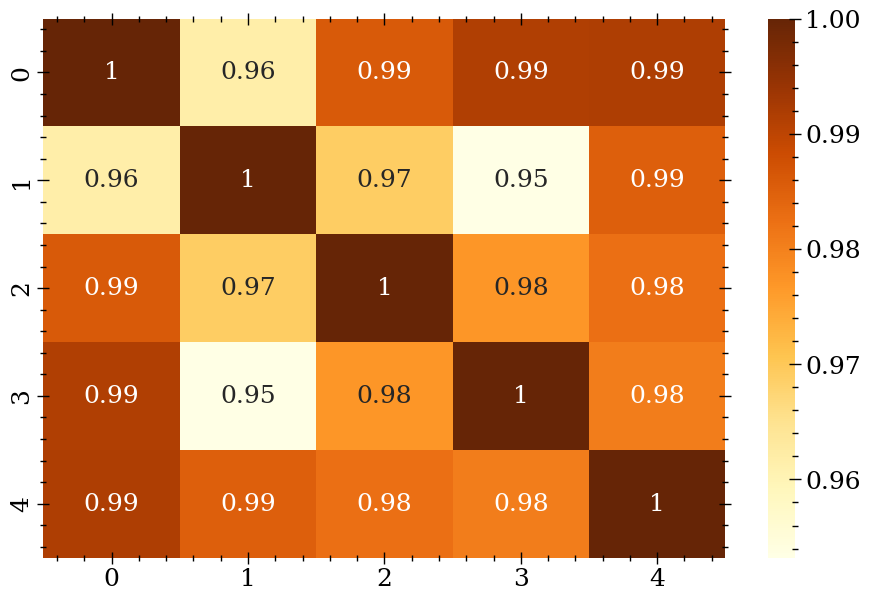

In [18]:
matrix = pd.DataFrame(monthsDataForKCities)
sns.color_palette("YlOrBr", as_cmap=True)
ax = sns.heatmap(matrix.T.corr(), annot=True,cmap="YlOrBr")

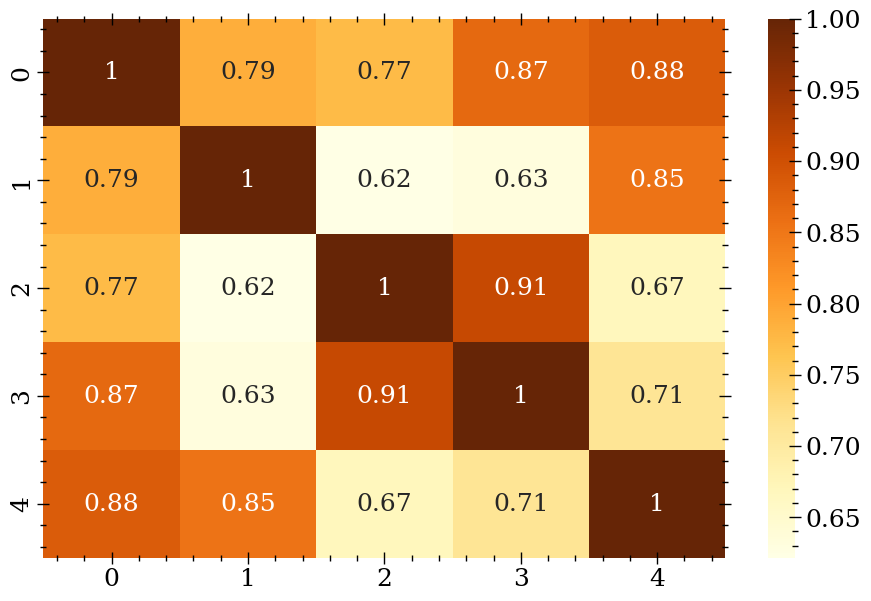

In [49]:
matrix = pd.DataFrame(weeksDataForKCities)
sns.color_palette("YlOrBr", as_cmap=True)
ax = sns.heatmap(matrix.T.corr(), annot=True,cmap="YlOrBr")

First Correlation Map (Monthly Sales)<br>
The first heatmap (monthly sales) shows very high correlations (mostly above 0.95). This indicates that the cities' sales trends are very similar on a month-to-month basis.<br>
High correlations suggest that external factors (e.g., economic conditions, seasonal demand) affect all cities similarly over longer time frames.<br>
Monthly data smooths out weekly fluctuations, which likely explains these high correlation values.
Second Correlation Map (Weekly Sales)
<br><br>
The second heatmap (weekly sales) has lower correlations (ranging from 0.62 to 0.91), meaning weekly sales patterns differ more between cities.<br>
Weekly data captures short-term variability, such as local events, promotions, or city-specific trends, which lead to lower correlations.<br>
Some city pairs still have moderate-to-high correlations (e.g., 0.87, 0.88), which could indicate regional similarities or coordinated campaigns.

C:\Users\aksha\AppData\Local\Temp\ipykernel_33164\1565372266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


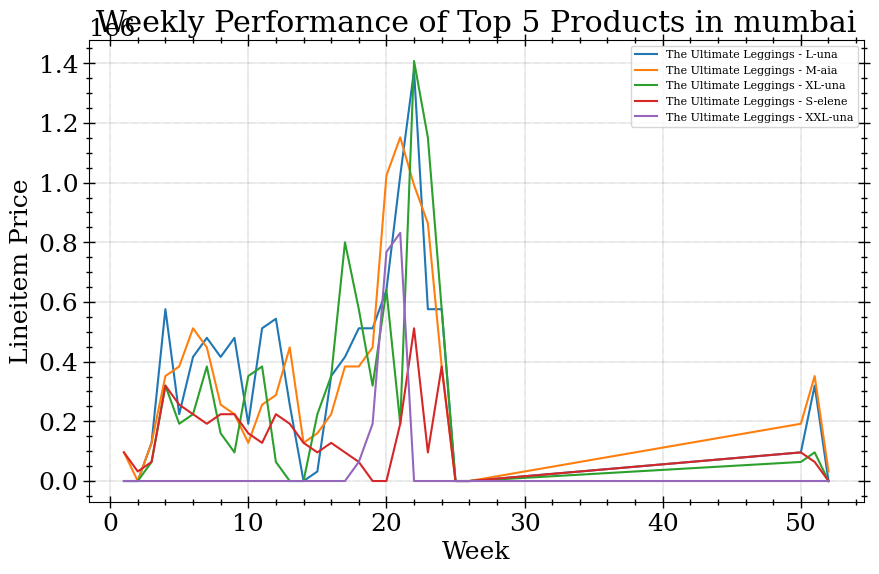

In [79]:
topKproducts = 5
topKcities = city[sortedcnts[:k]]
weeklyPerformance = {}

for ithcity in topKcities:
    dataKthCity = data[cities == ithcity]

    # Weekly sales for each product
    dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week
    weeklyProductSales = dataKthCity.groupby(['Week', 'Product'])['Lineitem price'].sum().unstack(fill_value=0)

    # Keep only the topK products
    prod, count = np.unique(dataKthCity['Product'], return_counts=True)
    sortedcounts = np.argsort(count)[::-1]
    topProducts = prod[sortedcounts[:topKproducts]]
    weeklyProductSalesTop = weeklyProductSales[topProducts]

    # Add to dictionary for further analysis
    weeklyPerformance[ithcity] = weeklyProductSalesTop

    # Plot weekly performance for each top product
    plt.figure(figsize=(10, 6))
    plt.title(f"Weekly Performance of Top {topKproducts} Products in {ithcity}")
    for product in topProducts:
        if product in weeklyProductSalesTop.columns:
            plt.plot(weeklyProductSalesTop.index, weeklyProductSalesTop[product], label=product)
    plt.xlabel("Week")
    plt.ylabel("Lineitem Price")
    plt.legend(fontsize=8)
    plt.show()
